# Principal Component Analysis (PCA) for images

Examples adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
import seaborn as sns

### Learning Objectives

1. You will understand how images can be represented as points in a high dimensional space.
2. You will be able to apply PCA to images.

### Images of hand drawn digits

Each 8x8 grayscale image is a point in a 64-dimensional space representing the instensity of each of the 64 pixels in the image.

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.data
numbers = digits.target

images.shape, numbers.shape

((1797, 64), (1797,))

Each row of `images` is a 64-dimensional data point representing an image of a hand drawn digit.

`numbers` are the numerical values 0-9 that each of the 1797 images correspond to.

Visualizing an image of a digit

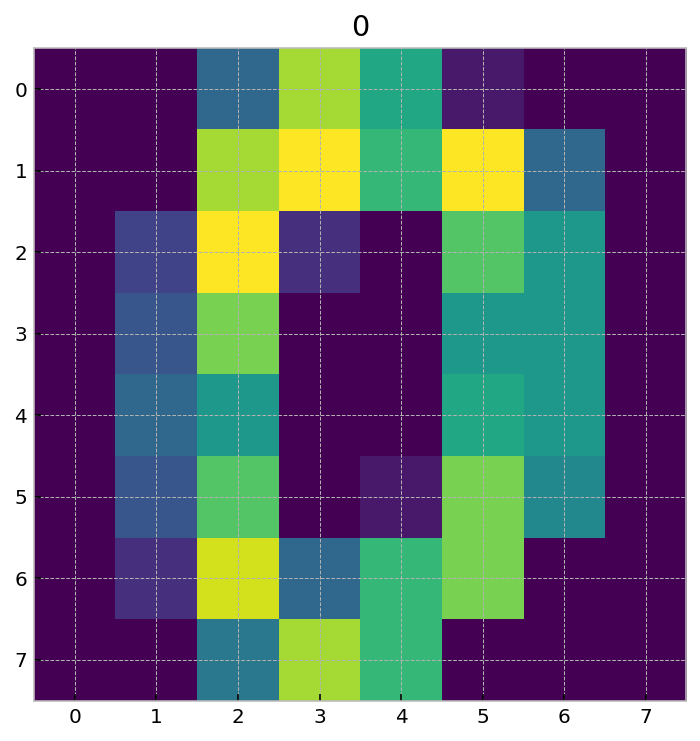

In [3]:
i = 0
plt.imshow(images[i,:].reshape(8, 8))
plt.title(f'{numbers[i]}');

### Visualize a bunch of images

In [4]:
def plot_digits(images, rows=5, cols=10):
    fig, ax = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
    k = 0
    for i in range(rows):
        for j in range(cols):
            ax[i,j].imshow(images[k,:].reshape(8, 8))
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            k += 1

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 9 5 5 6 5 0 9 8 9]
[8 4 1 7 7 3 5 1 0 0]


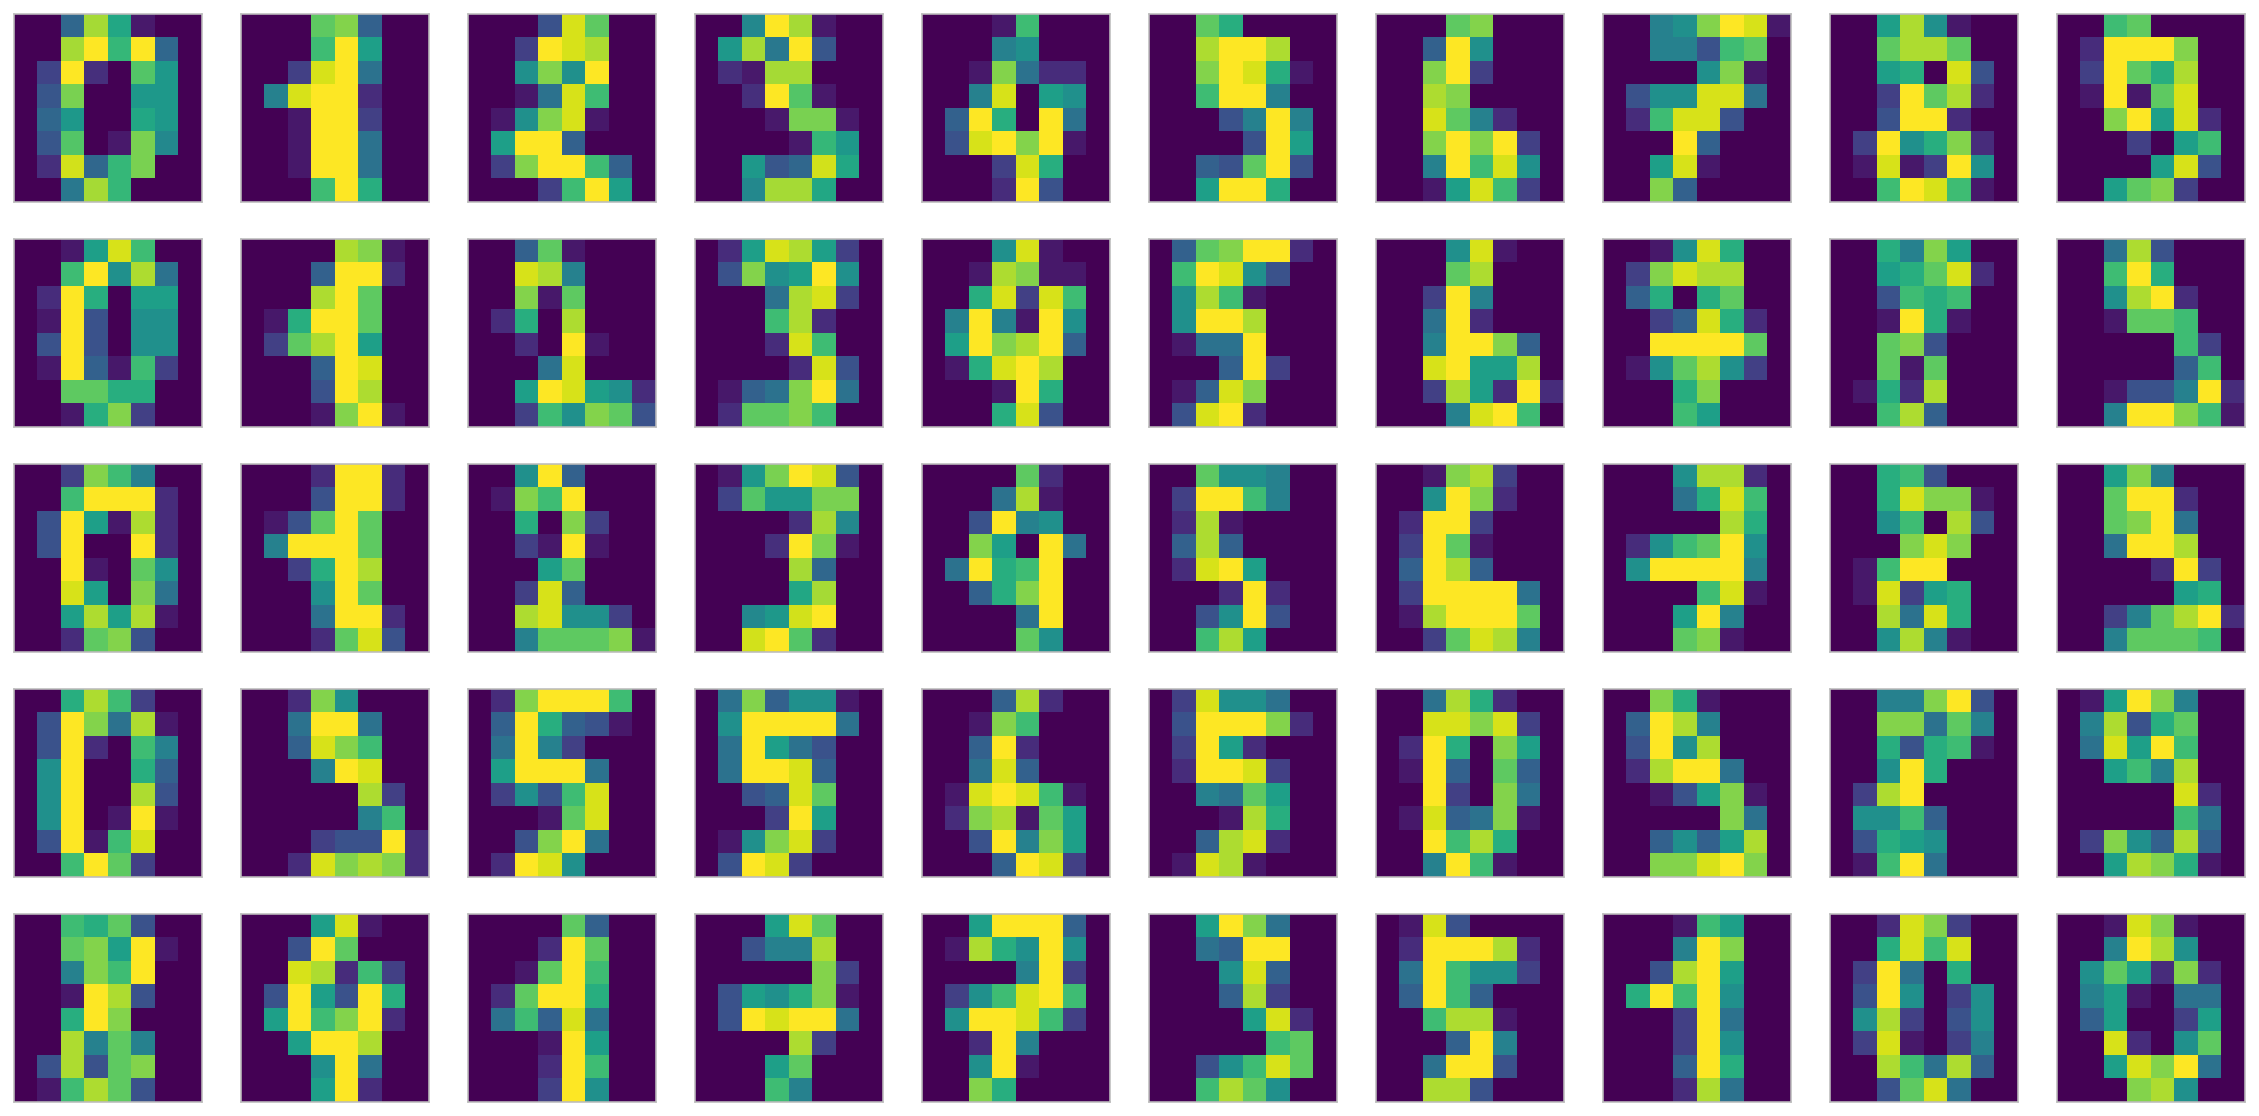

In [5]:
plot_digits(images)

for i in range(5):
    print(numbers[i*10:i*10+10])

Project 64-dimensional images onto a 2-dimensional space for visualization.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
images_pca = pca.fit_transform(images)

print(images.shape)
print(images_pca.shape)

(1797, 64)
(1797, 2)


The two principal components are mixtures of the original 64 dimensions (i.e. mixtures of the original pixel intensities), and thus can themselves be represented as images.

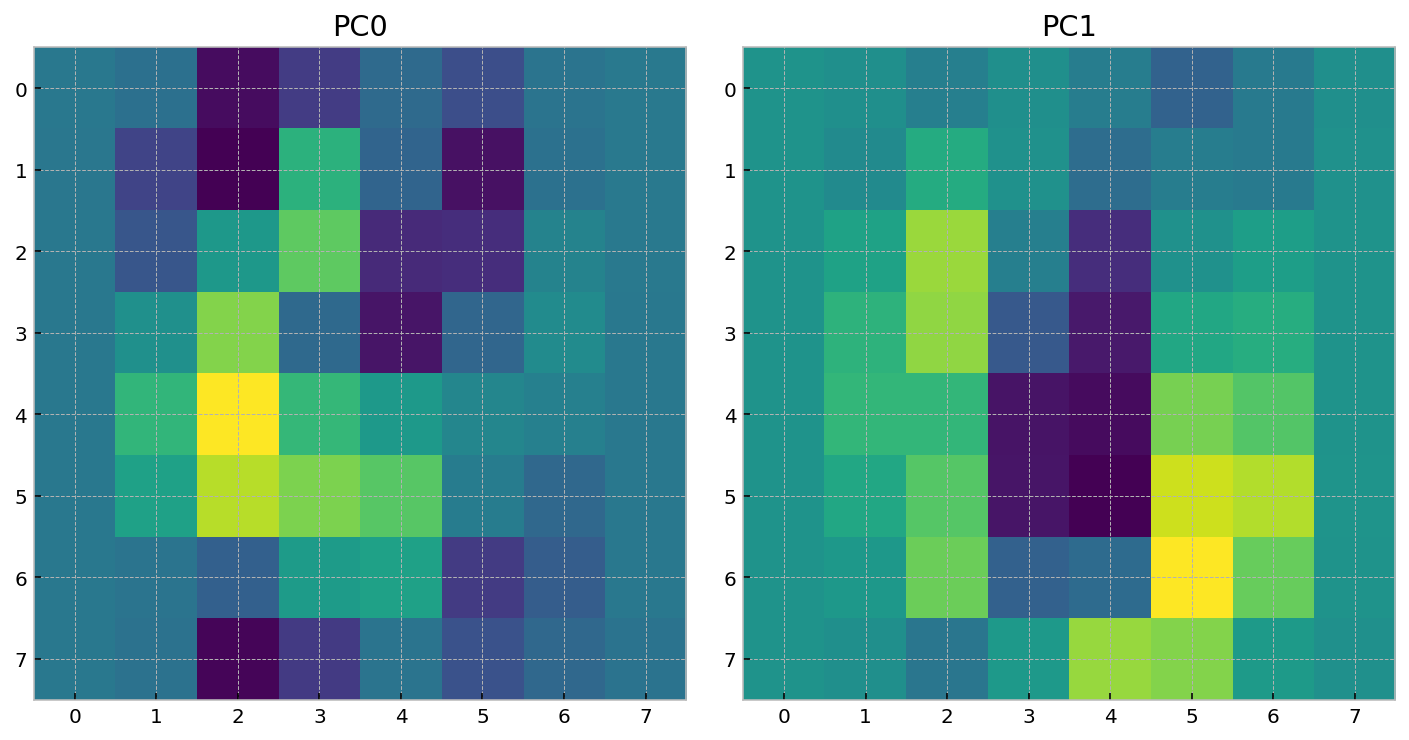

In [7]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(pca.components_[0].reshape(8, 8))
plt.title('PC0');
plt.subplot(122)
plt.imshow(pca.components_[1].reshape(8, 8))
plt.title('PC1');
plt.tight_layout();

How do the images cluster according to their digit value in this vastly reduced 2-dimensional space?

/var/folders/k1/swt2sp1x6mj7wyc2cs76qq4m0000gn/T/ipykernel_82137/1679875237.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


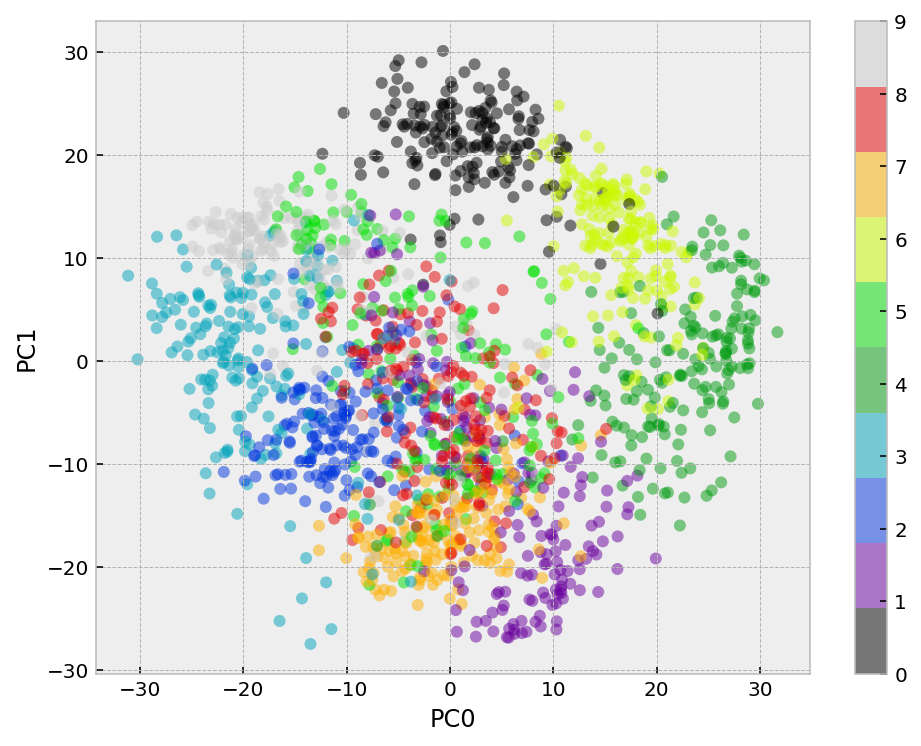

In [8]:
plt.scatter(images_pca[:,0], images_pca[:,1],
            c=numbers, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.colorbar();

What do the images look like after projecting onto only two PCs?

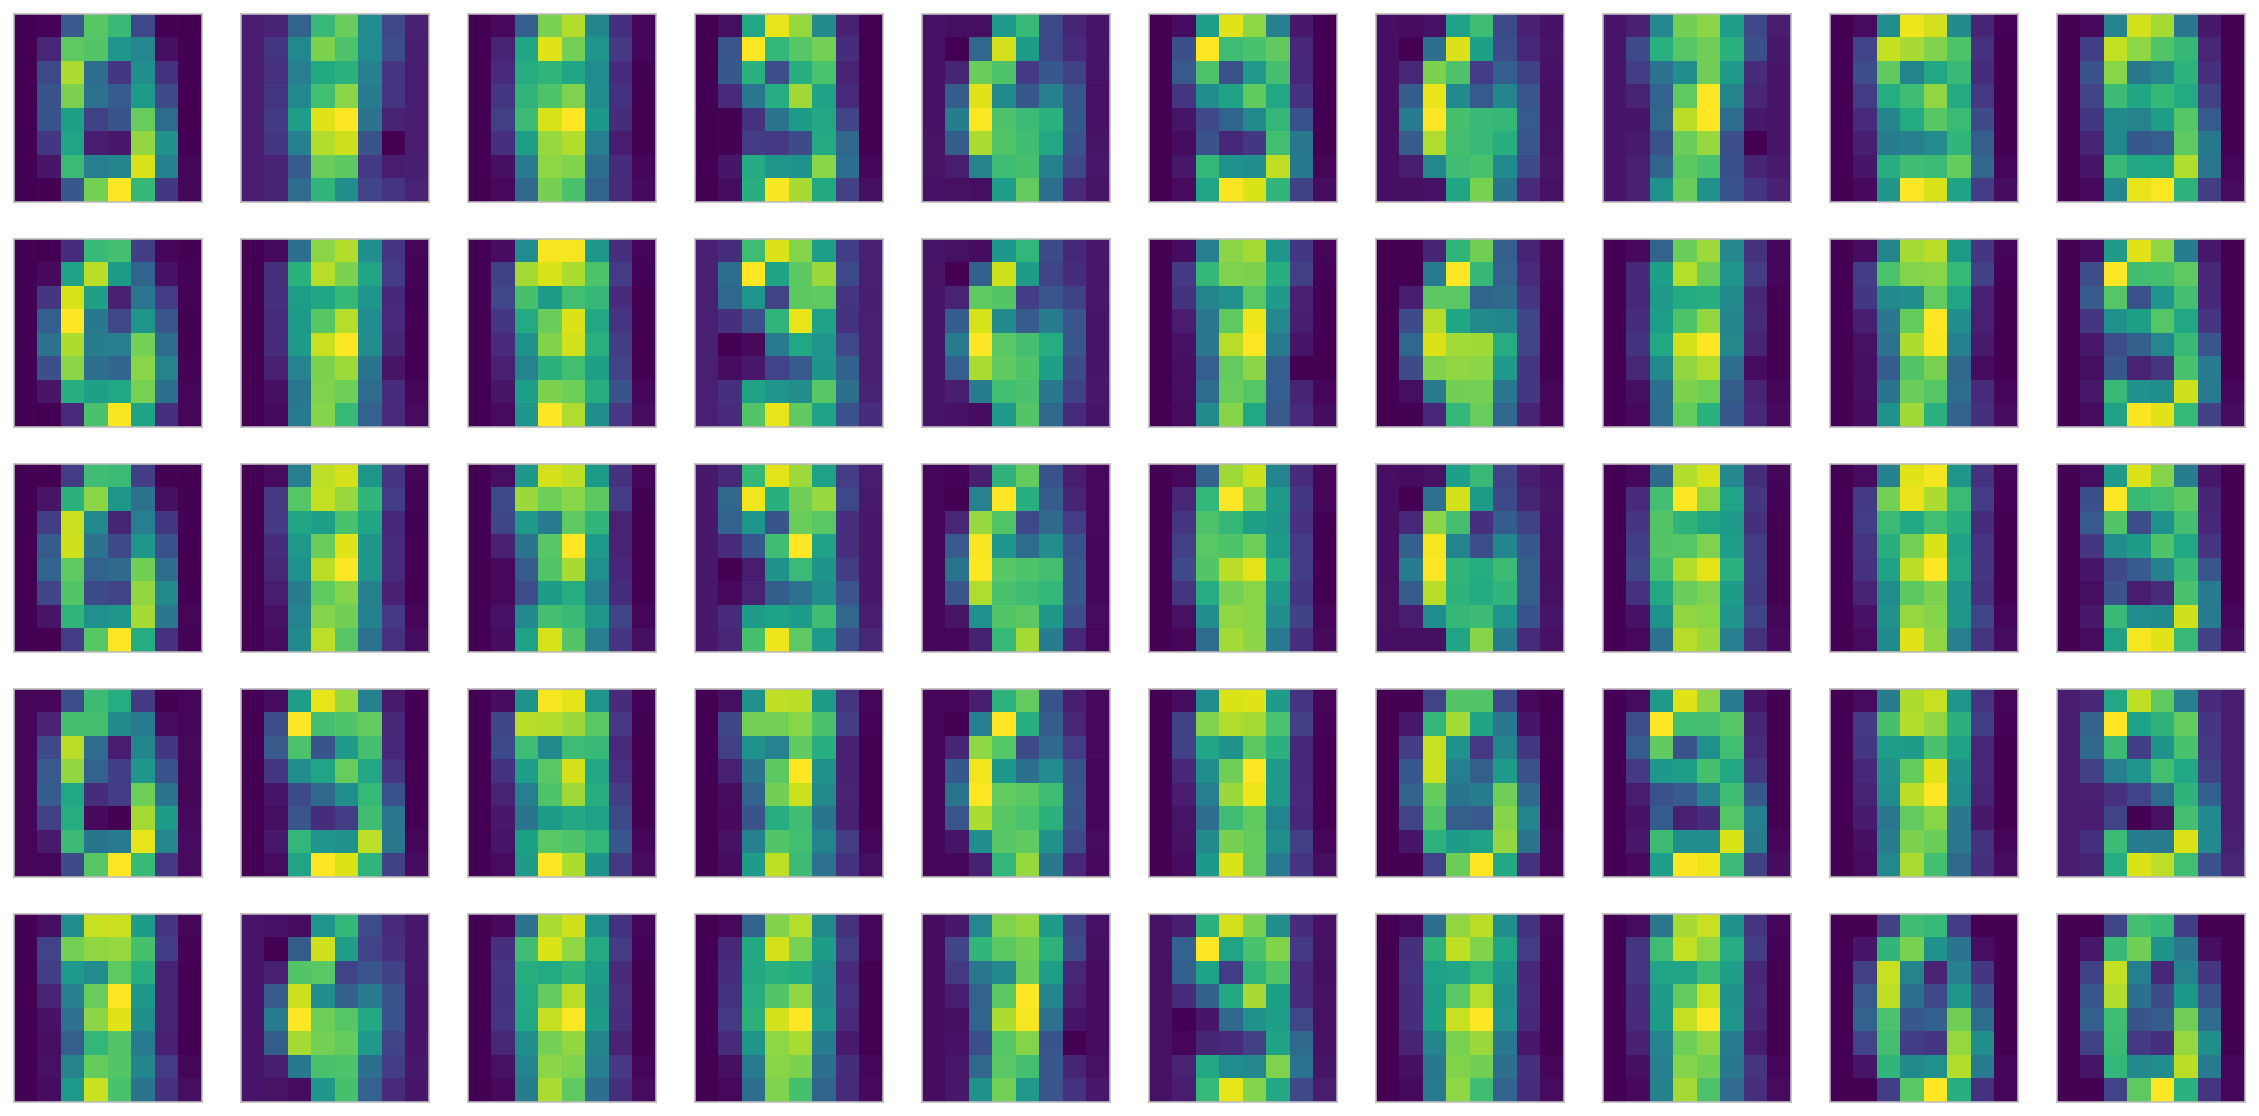

In [9]:
images_projected = pca.inverse_transform(images_pca)

plot_digits(images_projected)

How well did we do at explaining the variance in the image data with only two PCs?

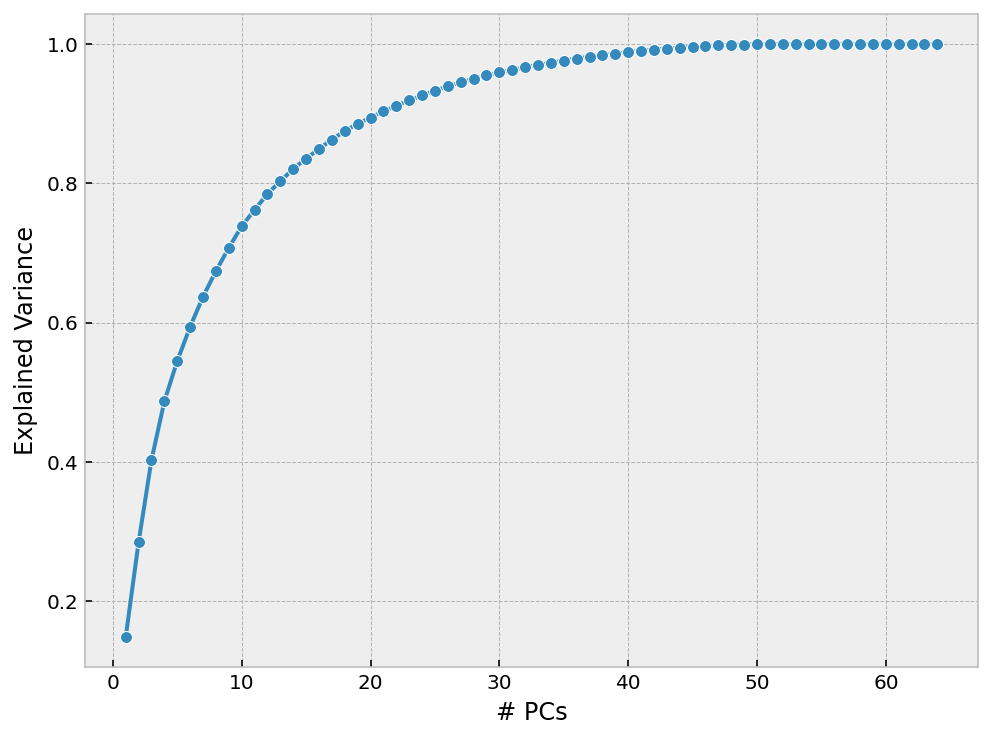

In [10]:
pca = PCA()
pca.fit_transform(images)

numPC = np.arange(1, pca.n_components_ + 1)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

# Exercise

Use PCA to project the images dataset onto 20 dimensions.

In [ ]:
pca = ...

...

images_projected = ...

plot_digits(images_projected)

### PCA as a filter for noisy data

### Learning Objectives

1. You will see how PCA can be used as a filter to remove noise.

Adding some random noise to the images

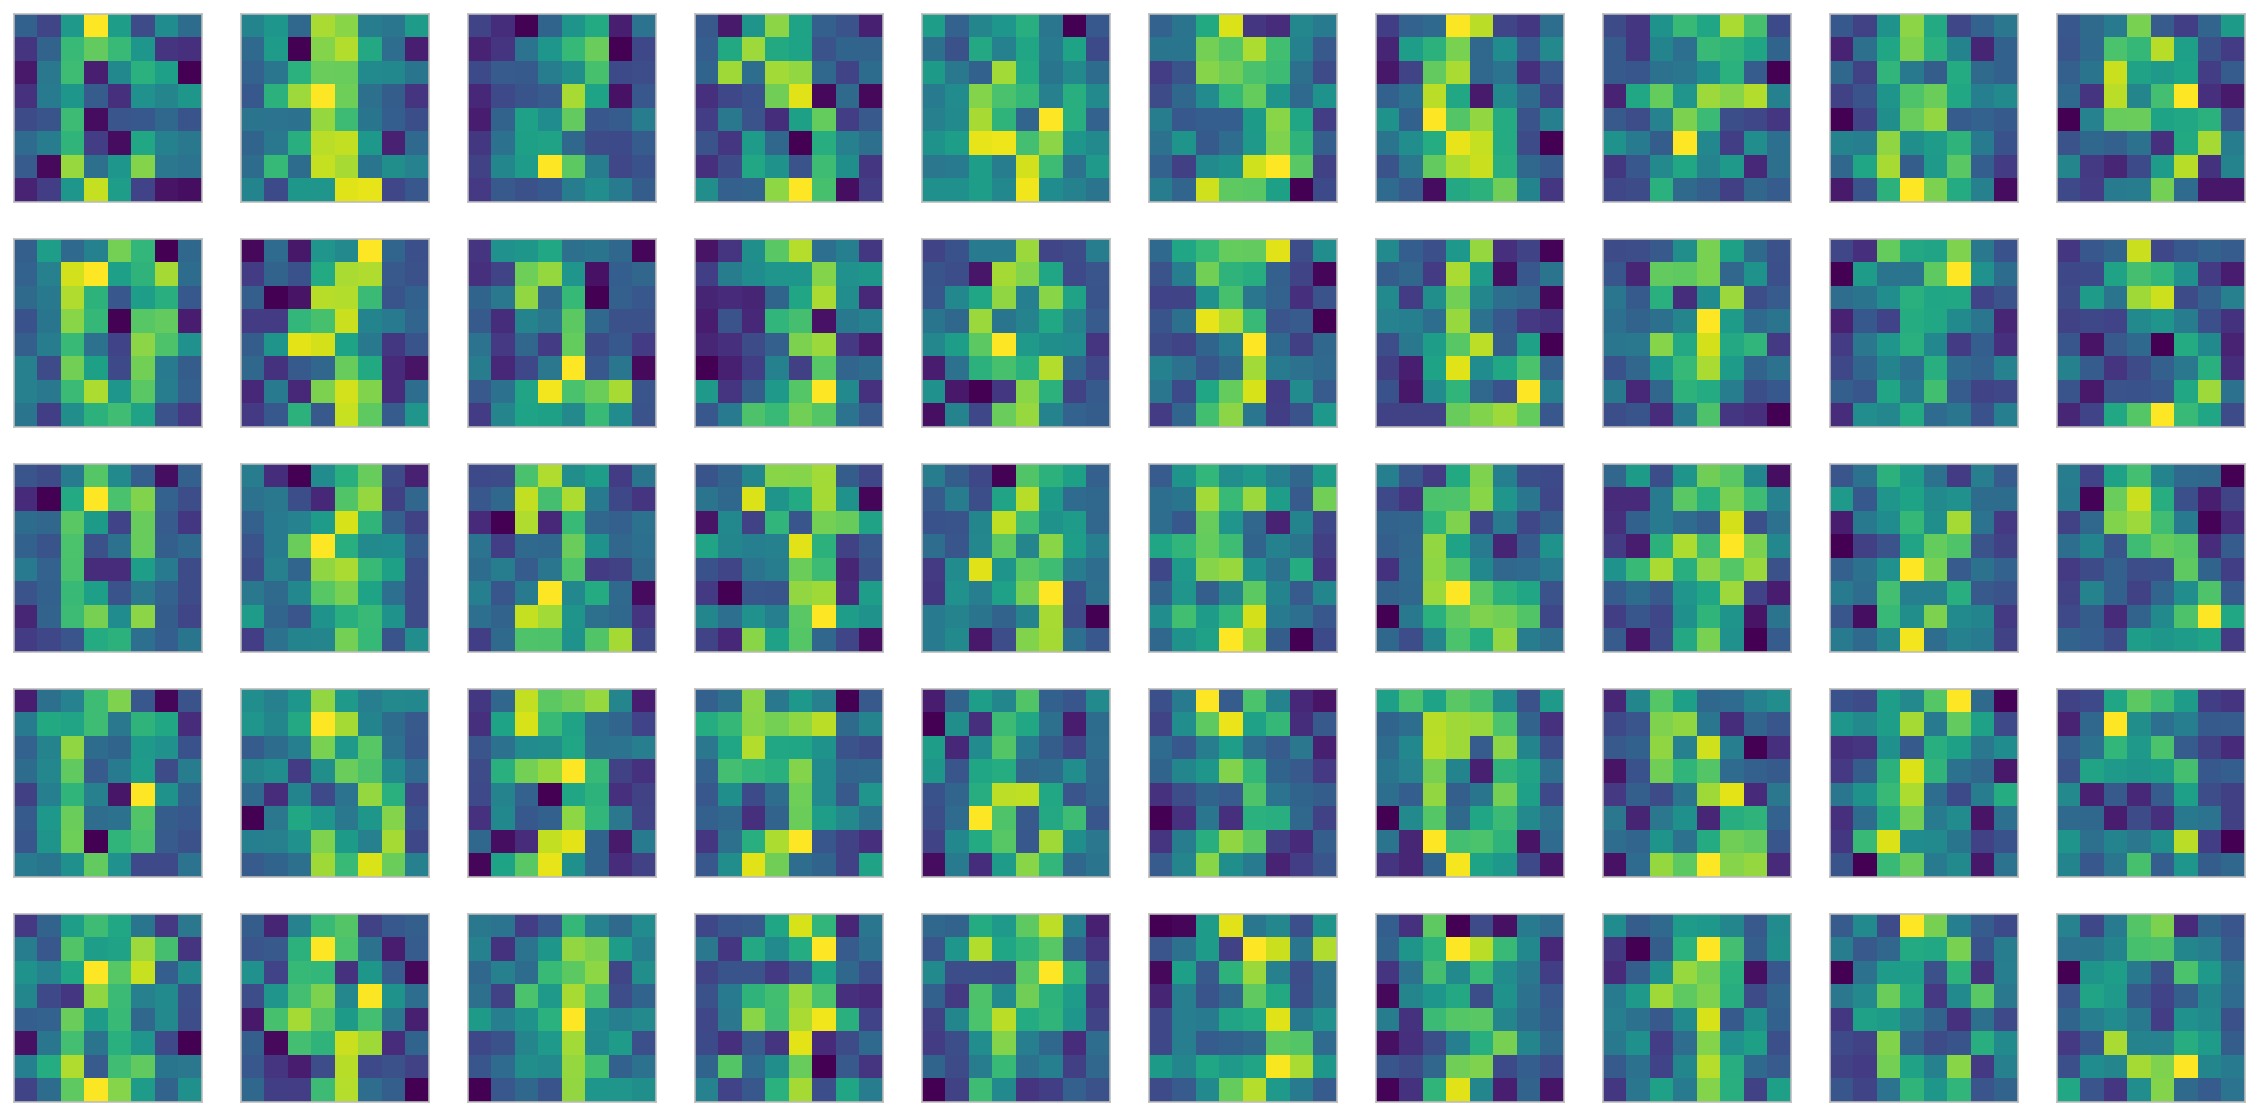

In [11]:
np.random.seed(42)
noisy_images = np.random.normal(images, 4)
plot_digits(noisy_images)

In [12]:
# PCA that preserves 50% of the variance in the data
pca = PCA(0.50)
pca.fit(noisy_images)

pca.n_components_

12

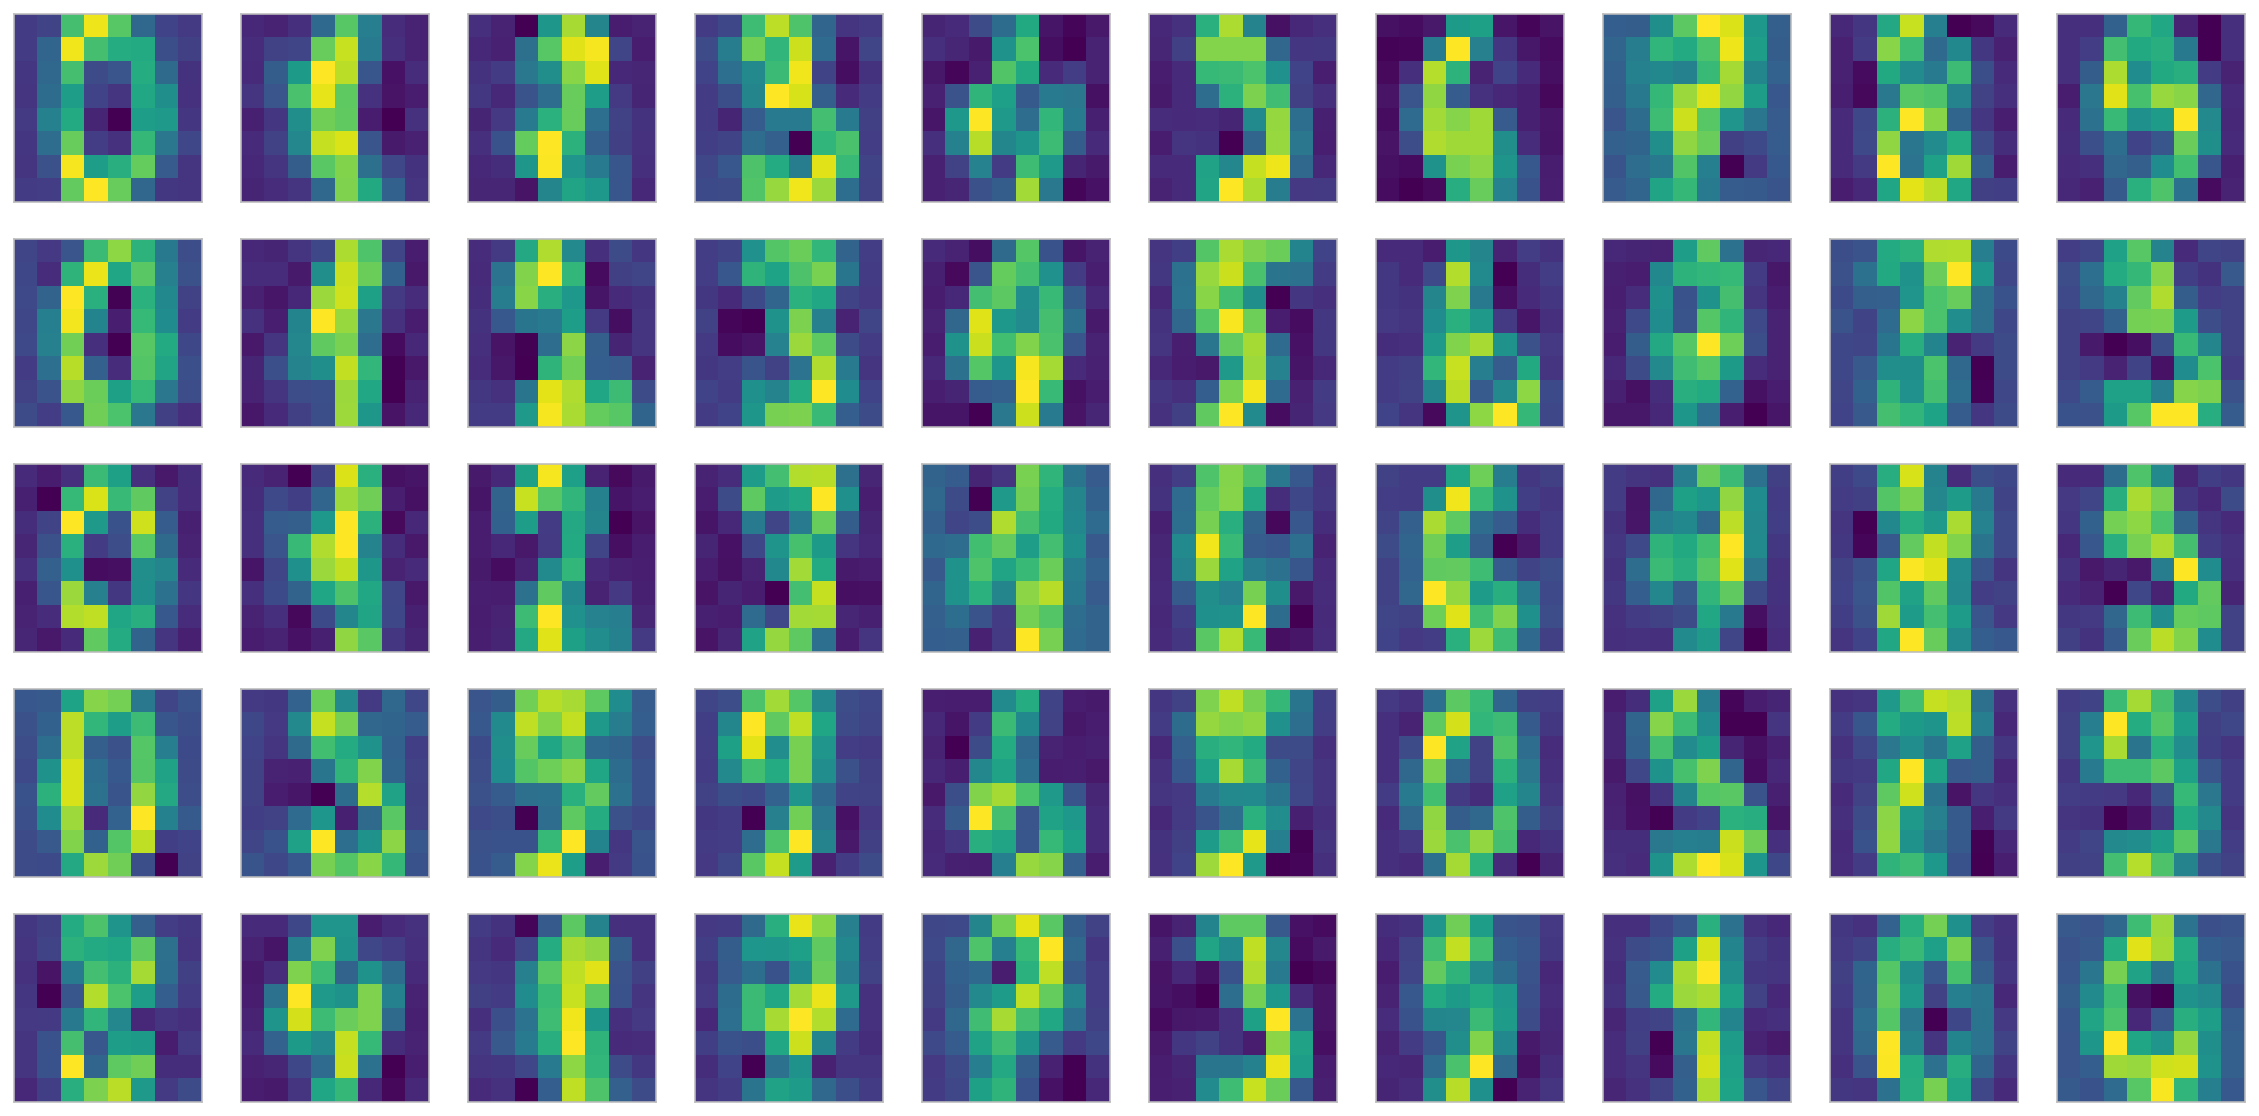

In [13]:
noisy_images_pca = pca.transform(noisy_images)
filtered_images = pca.inverse_transform(noisy_images_pca)
plot_digits(filtered_images)

### Eigenfaces

In [17]:
# WARNING !!! This is ~200 MB of data which may take a few minutes to download!
# Each face image is 62x47 pixels for a total of 2914 pixels
from sklearn.datasets import fetch_lfw_people
faces_data = fetch_lfw_people(min_faces_per_person=60)

In [20]:
# each row of faces is a 62x47 image of one of eight different people
faces = faces_data.data
labels = faces_data.target
names = faces_data.target_names

print(faces.shape)
print(labels.shape)
print(labels)
print(names)

(1348, 2914)
(1348,)
[1 3 3 ... 7 3 5]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


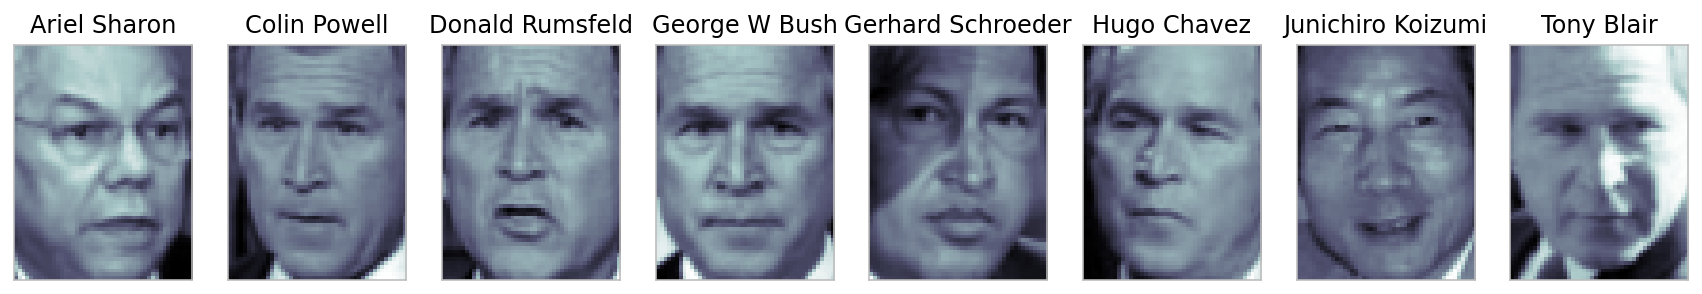

In [22]:
plt.figure(figsize=[15, 5])
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(faces[i,:].reshape(62,47), cmap='bone')
    plt.xticks([])
    plt.yticks([])
    plt.title(names[i], fontsize=12)

Project each 2914-dimensional images onto only 150 dimensions.

In [23]:
# PCA for first 150 principal components
# Randomized solver performs some approximates to speed up the computation for high dimensional data sets
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces)

PCA(n_components=150, svd_solver='randomized')

In [24]:
pca.components_.shape

(150, 2914)

First 8 principal components

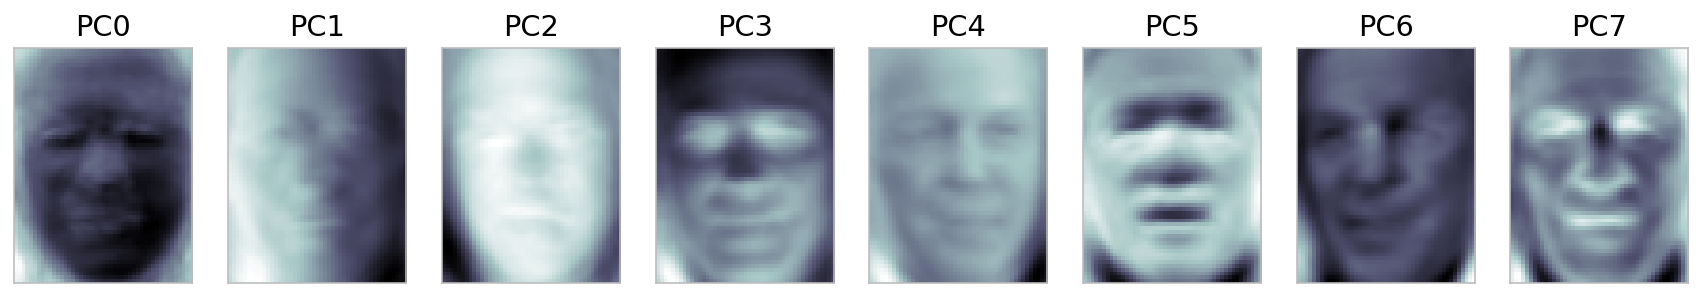

In [25]:
plt.figure(figsize=(15, 5))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(pca.components_[i,:].reshape(62,47), cmap='bone')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'PC{i}')

How much of the variance in the face images does the first 150 PCs explain?

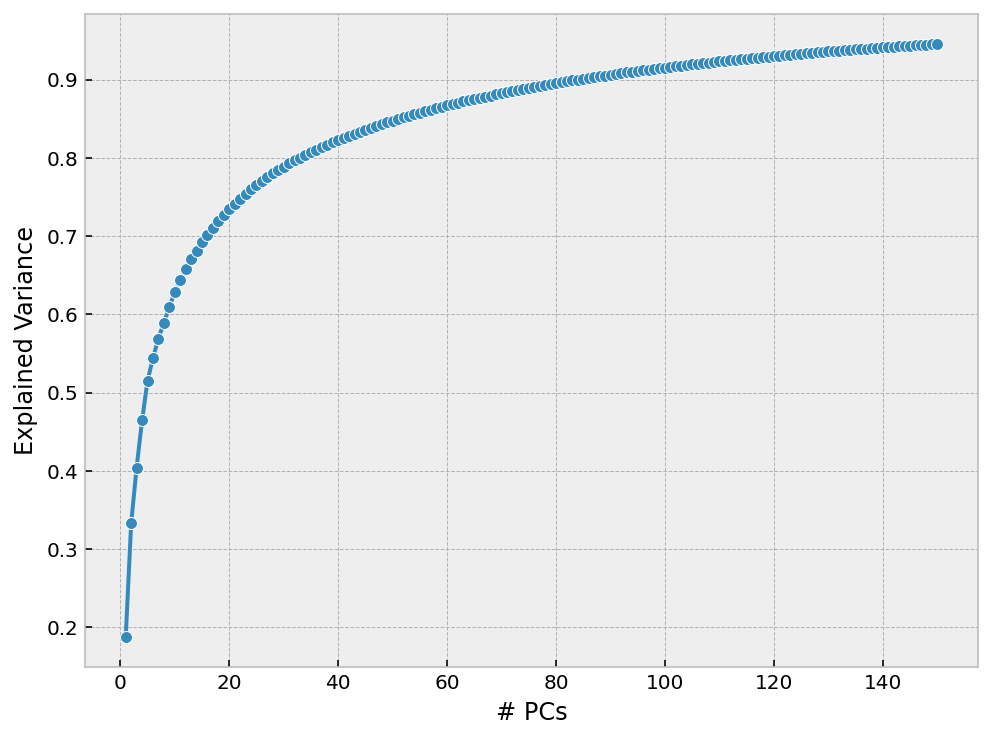

In [26]:
numPC = np.arange(1, 151)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

What do the reduced dimension images look like?

In [27]:
faces_pca = pca.transform(faces)
faces_projected = pca.inverse_transform(faces_pca)

print(faces.shape)
print(faces_pca.shape)
print(faces_projected.shape)

(1348, 2914)
(1348, 150)
(1348, 2914)


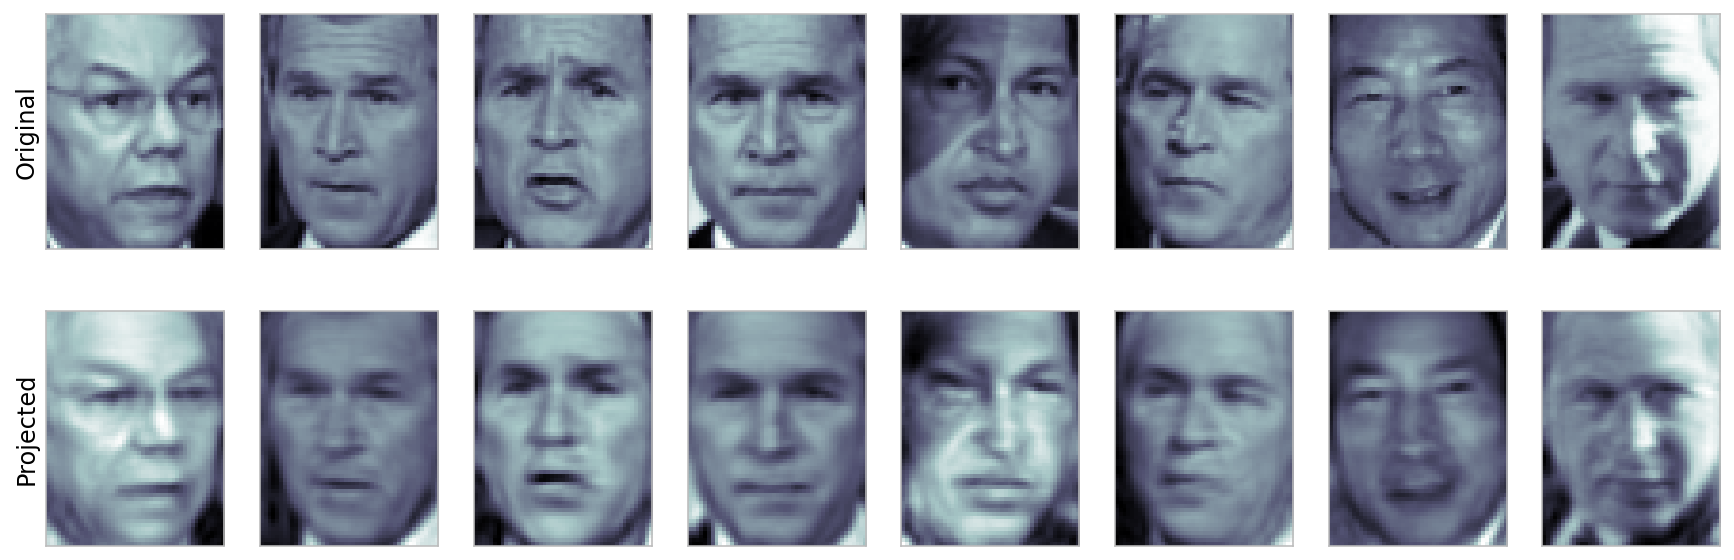

In [28]:
fig, ax = plt.subplots(2, 8, figsize=(15, 5))
for i in range(8):
    # original face
    ax[0,i].imshow(faces[i,:].reshape(62, 47), cmap='bone')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    if i == 0:
        ax[0,i].set_ylabel('Original')
    # projected face
    ax[1,i].imshow(faces_projected[i,:].reshape(62, 47), cmap='bone')
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    if i == 0:
        ax[1,i].set_ylabel('Projected')